# ÜBUNGSBLATT IV

## Aufgabe 1

Bestimmen Sie alle Nullstellen der Funktion $$y = x^3 +2x^2-x-2$$

**a)** mit Hilfe eines symbolischen Algorithmus

In [1]:
clear all;
disp('Symbolic')
syms x y
y = x^3 + 2*x^2 - x - 2 == 0;
y0 = solve(y)

Symbolic


**b)** mit Hilfe eines numerischen Algorithmus.

In [2]:
disp('Numeric')
f = [1, 2, -1 -2];
roots(f)

Numeric


ans = 3x1 double
    1.0000
   -2.0000
   -1.0000

## Aufgabe 2

**a)** Plotten Sie die Funktion $$f(x) = \sin{(5x – 2)}$$ sowie in das gleiche Fenster deren erste und zweite Ableitung über dem Intervall [0, 10] unter Verwendung des symbolischen Algorithmus.

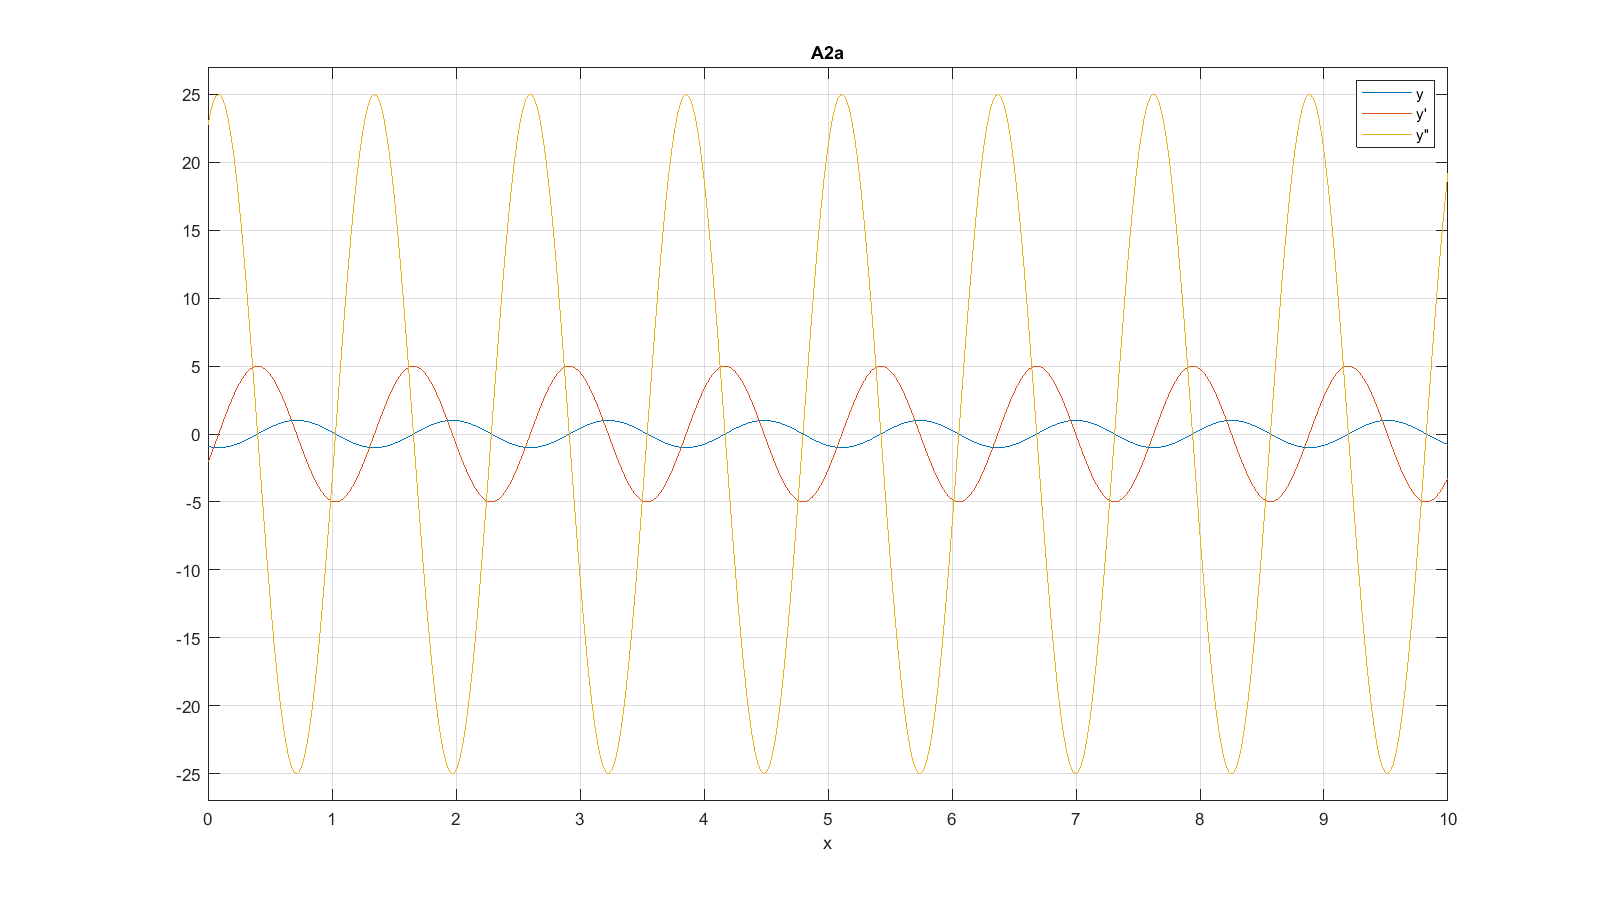

In [3]:
clear all;
clf;
syms x;
y = sin(5*x-2);
xs = [0, 10];

ezplot(y, xs)
hold on
ezplot(diff(y,1), xs)
hold on
ezplot(diff(y,2), xs)

set(gcf,'Position', [0 0 1280 720])
ylim([-27 27])
title('A2a')
legend('y', 'y''', 'y''''')
grid on
hold off

**b)** Plotten Sie die Funktion $$f(x) = \sin{(5x – 2)}$$ sowie in das gleiche Fenster deren erste und zweite Ableitung über dem Intervall [0, 10] unter Verwendung des numerischen Algorithmus. Wo tritt ein numerischer Fehler auf? Wie lässt er sich minimieren? Experimentieren Sie mit der Zahl der Stützstellen.

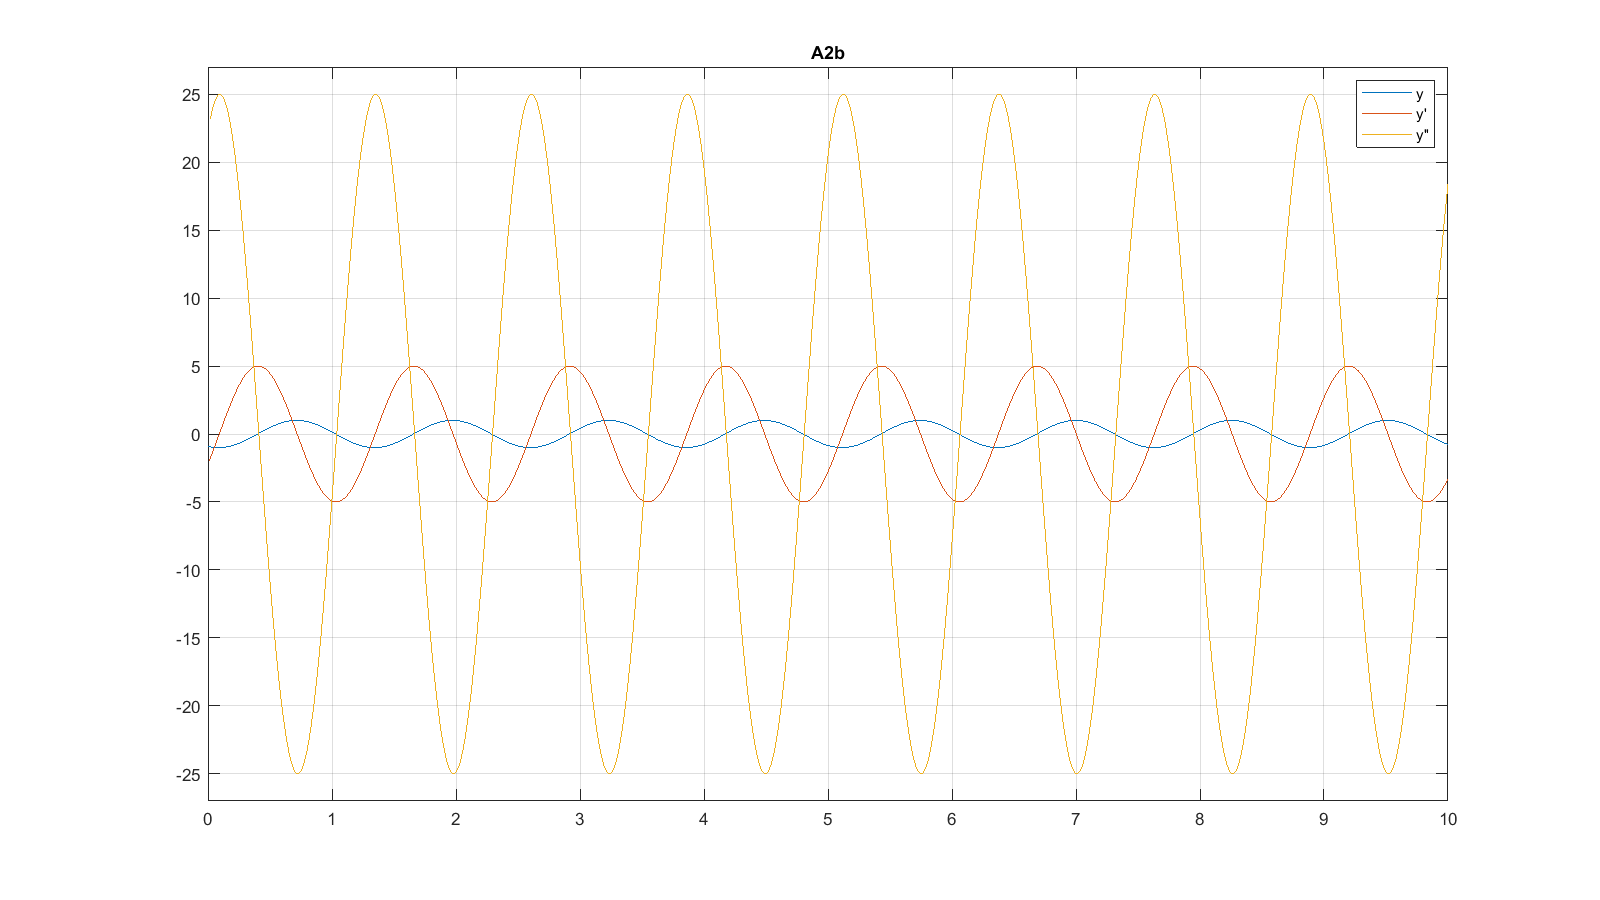

In [4]:
clear all;
clf;
xs = linspace(0,10,1000);
ys = y(xs);
dys = diff(ys)./diff(xs);
ddys = diff(dys)./diff(xs(2:end));

plot(xs(1:end), ys);
hold on
plot(xs(2:end), dys);
hold on
plot(xs(3:end), ddys);

set(gcf,'Position', [0 0 1280 720])
grid on
ylim([-27 27])
title('A2b')
legend('y', 'y''', 'y''''')

function result = y(x)
    result = sin(5*x-2);
end
hold off

## Aufgabe 3

**a)** Bestimmen Sie symbolisch die Potenzreihe PRf der Funktion $$f(x) = \sin{(5x – 2)}$$ bis zur 3. Potenz im Entwicklungspunkt $x0 = 2$.

**b)** Plotten Sie ins gleiche Fenster $$f(x) = \sin{(5x – 2)}$$ sowie PRf im Intervall $1.5 < x < 2.5$

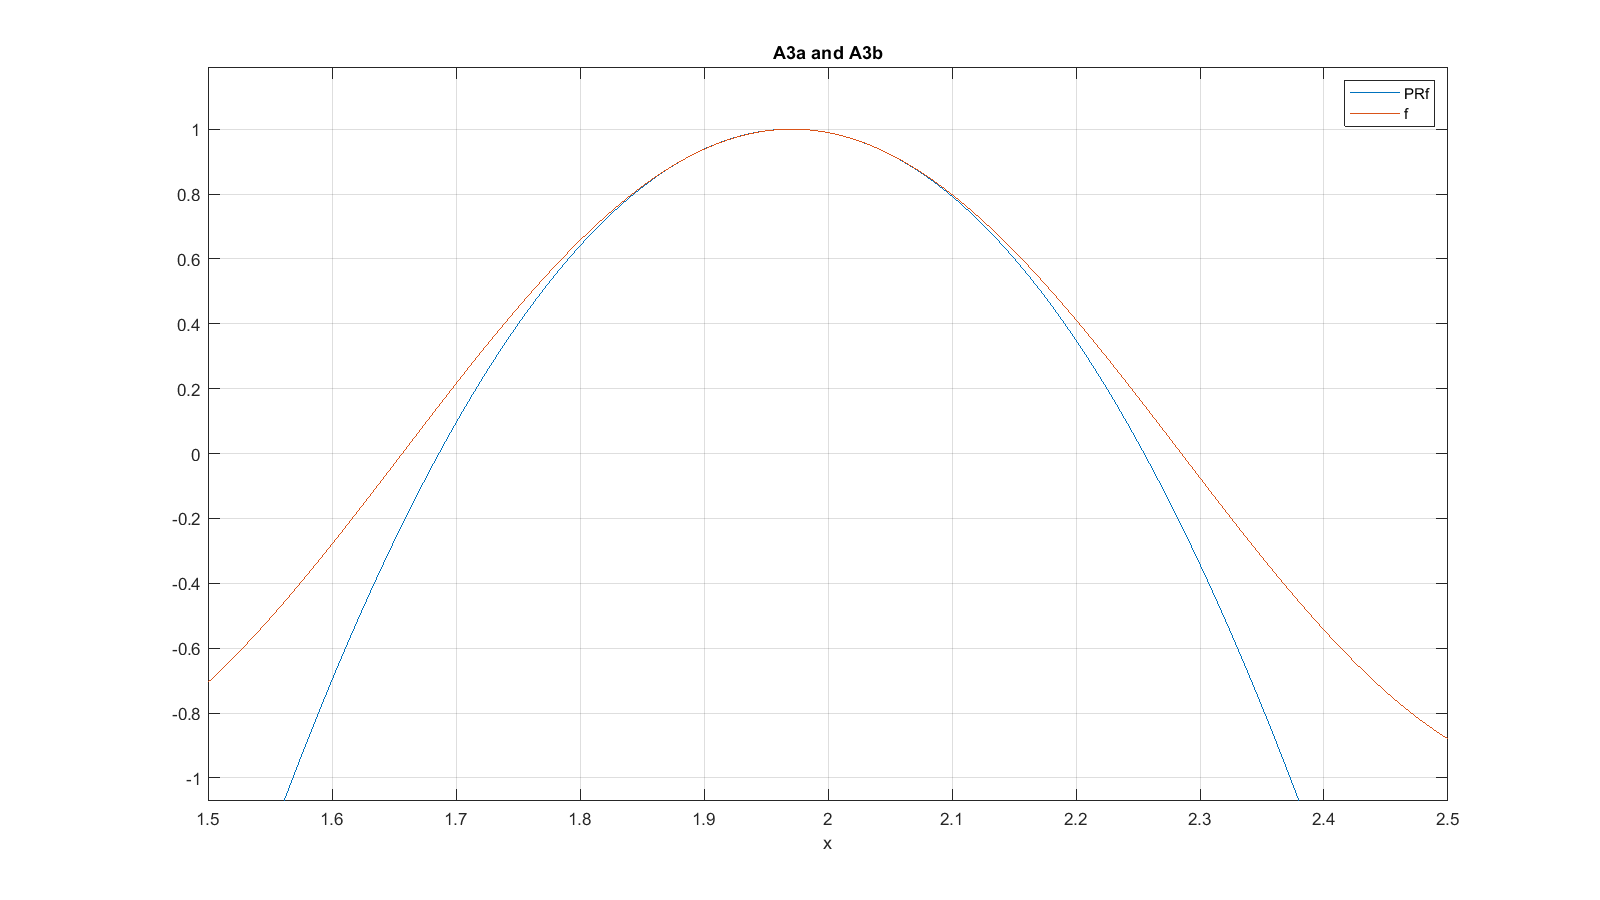

In [5]:
clear all;
clf;
syms x;
f = sin(5*x-2);
% a)
PRf = taylor(f, x, 2, 'Order', 3)

% b)
xint = [1.5 2.5];
ezplot(PRf, xint)
hold on
ezplot(f, xint)

set(gcf,'Position', [0 0 1280 720])
title('A3a and A3b')
legend('PRf', 'f')
grid on
hold off

## Aufgabe 4

**a)** Lösen Sie symbolisch die DGLs $$\frac{dy}{dx} = x\cdot y^2$$ und $$\frac{dy}{dt} = x\cdot y^2$$

In [6]:
clear all;
syms y(x) x;
dydx = diff(y,x) == x*y^2;
y(x) = dsolve(dydx) % get y(x)

In [7]:
syms t x y(t);
dydt = diff(y,t) == x*y^2;
y(t) = dsolve(dydt) % get y(t)

**b)** Überprüfen Sie die Korrektheit der erhaltenen Lösungen, indem Sie die Probe durchführen.

In [8]:
yxCheck = diff(y(x),x) - x*power(y(x),2) % get y'(x) by differentiating above solution
ytCheck = diff(y(t),t) - x*power(y(t),2) % get y'(t) by differentiating above solution

## Aufgabe 5

Lösen Sie die folgende DGL eines Wachstumsprozesses: $$\dot{P}(t) = \alpha \cdot \left( P(t) \right)^{\beta}$$

mit $\alpha = 2.2$, $\beta = 1.0015$ und der Anfangsbedingung $P(0) = 1000$ numerisch und für $\beta = 1$ auch symbolisch.

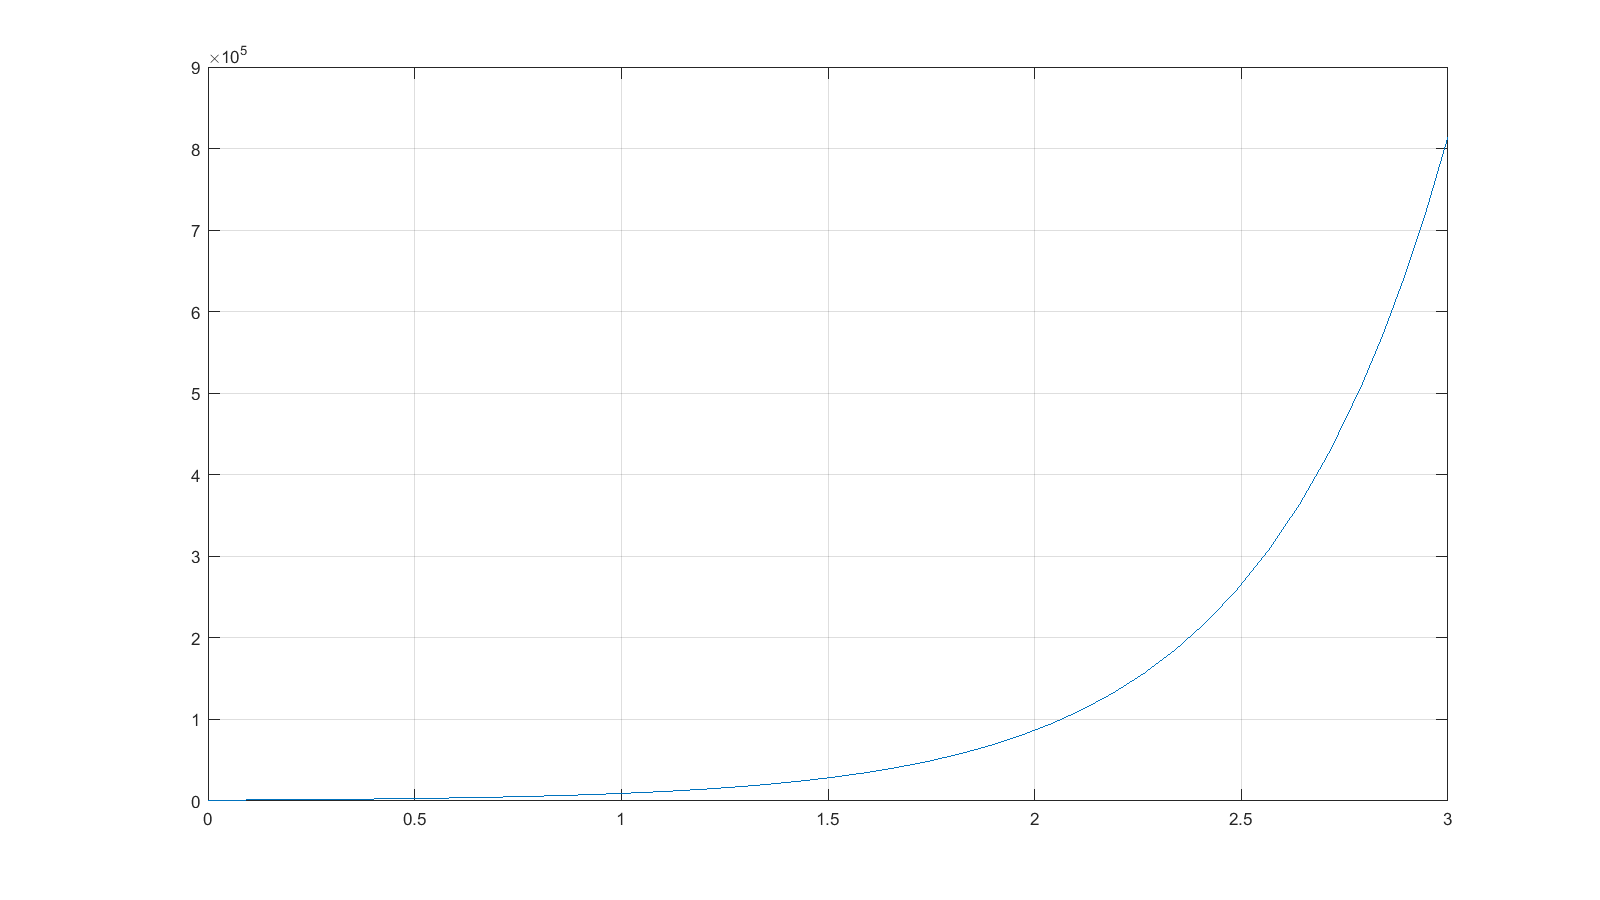

In [9]:
clear all;
clf;
a = 2.2;
b = 1.0015;
tspan = [0, 3];
P0 = 1000;
Pdot = @(t,P)(a*P^b);
[t, P] = ode45(Pdot, tspan, P0);

plot(t,P)
set(gcf,'Position', [0 0 1280 720])
grid on
hold off

In [10]:
syms a P(t) t;
p0 = P(0) == 1000;
dP = diff(P,t) == 2.2 * P;
P(t) = dsolve(dP, p0) % get P(t)

## Aufgabe 6

**a)** Lösen Sie die Schwingungs-DGL $$\ddot{y}(t) + a\cdot \dot{y}(t) + b\cdot y(t) = 0$$
mit den Anfangsbedingungen $y(0) = 2$, $\dot{y}(0) = 1$ und den Parameterwerten aus (i). (ii) und (iii) symbolisch. Stellen Sie die Lösungsfunktionen im Intervall [0, 10] grafisch dar und interpretieren Sie die Lösungen.
  * (i) $a = 0, b = 2$
  * (ii) $a = 1, b = 2$
  * (iii) $a = 3, b = 1$

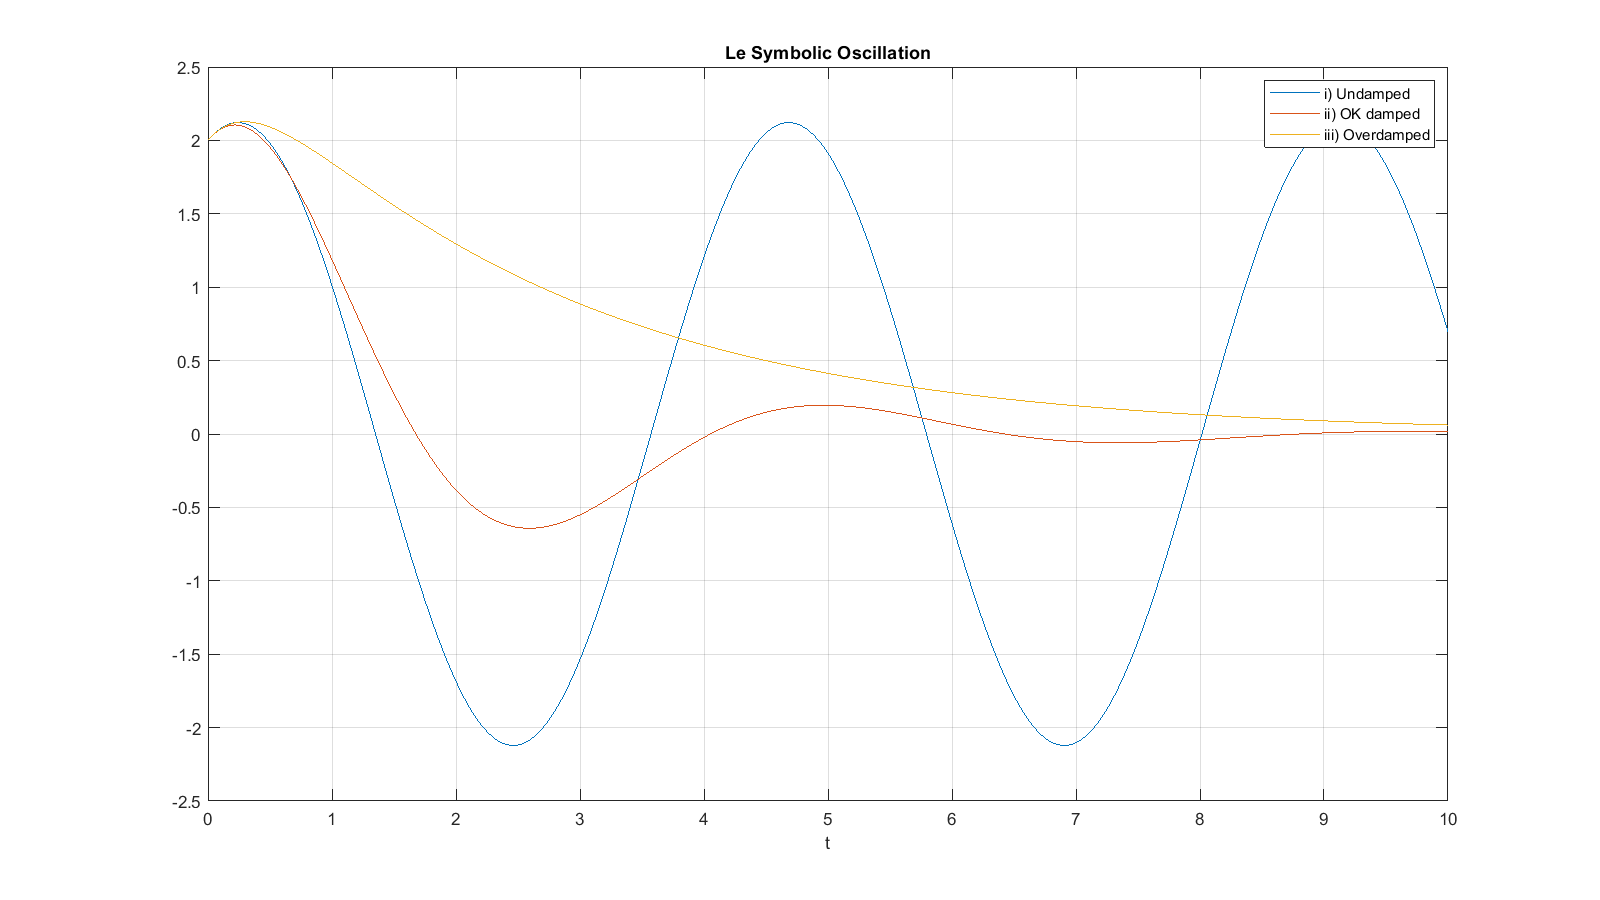

i) a=0, b=2


ii) a=1, b=2


iii) a=3, b=1


In [11]:
clear all;
clf;
syms y(t) t a b

% equations
dy = diff(y, t);
ddy = diff(y, t, 2);

% conditioning
y0 = y(0) == 2;
dy0 = dy(0) == 1;

% i) a=0, b=2
disp('i) a=0, b=2')
eqn = ddy == -0*dy -2*y;
soli = dsolve(eqn, [y0, dy0])
% chr = latex(soli)

% ii) a=1, b=2
disp('ii) a=1, b=2')
eqn = ddy == -1*dy -2*y;
solii = dsolve(eqn, [y0, dy0])
% chr = latex(solii)

% iii) a=3, b=1
disp('iii) a=3, b=1')
eqn = ddy == -3*dy -1*y;
soliii = dsolve(eqn, [y0, dy0])
% chr = latex(soliii)

ezplot(soli, [0, 10])
hold on
ezplot(solii, [0, 10])
hold on
ezplot(soliii, [0, 10])
hold on

set(gcf,'Position', [0 0 1280 720])
grid on
ylim([-2.5,2.5])
title('Le Symbolic Oscillation')
legend('i) Undamped', 'ii) OK damped', 'iii) Overdamped')
hold off

**b)** Lösen Sie die gleiche DGL numerisch und stellen Sie die Ergebnisse ebenfalls grafisch dar.

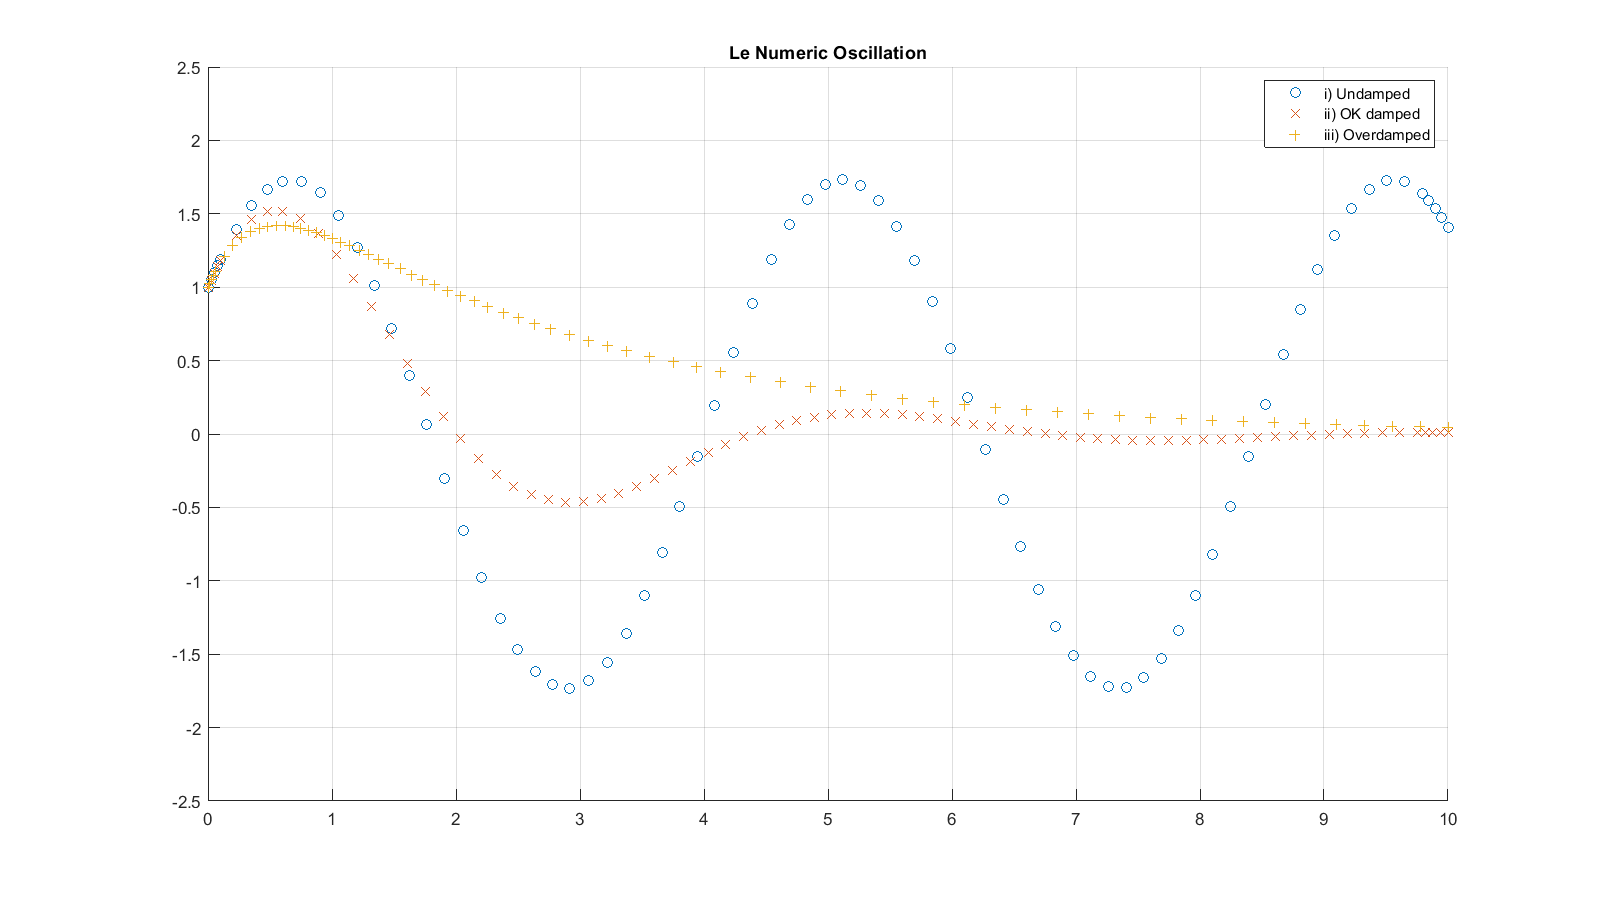

In [12]:
clf;
tspan = [0, 10];
y0 = [1, 2];

% i) a=0, b=2
a = 0;
b = 2;
osc = @(t,y)[y(2); -a*y(2)-b*y(1)];
[ti, yi] = ode45(osc, tspan, y0);
scatter(ti, yi(:,1))
hold on

% % ii) a=1, b=2
a = 1;
b = 2;
osc = @(t,y)[y(2); -a*y(2)-b*y(1)];
[tii, yii] = ode45(osc, tspan, y0);
scatter(tii,yii(:,1),'x')
hold on

% iii) a=3, b=1
a = 3;
b = 1;
osc = @(t,y)[y(2); -a*y(2)-b*y(1)];
[tiii, yiii] = ode45(osc, tspan, y0);
scatter(tiii,yiii(:,1),'+')

set(gcf,'Position', [0 0 1280 720])
grid on
ylim([-2.5,2.5])
title('Le Numeric Oscillation')
legend('i) Undamped', 'ii) OK damped', 'iii) Overdamped')
hold off

a) und b) im gleichen Plot für bessere Vergleichbarkeit:

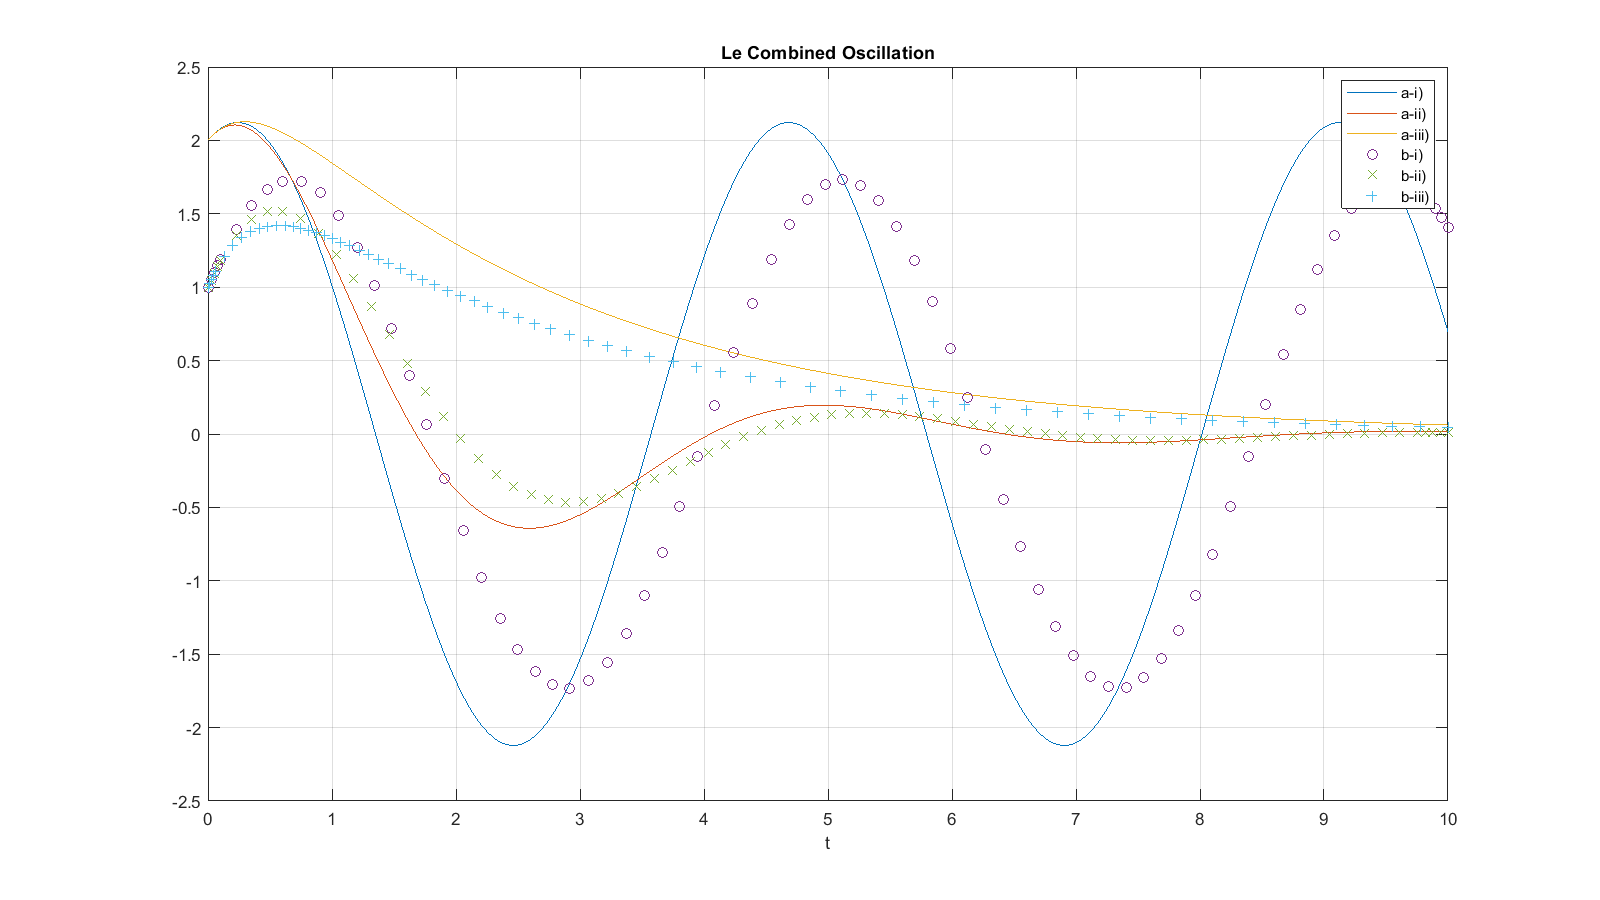

In [13]:
clf;
ezplot(soli, [0, 10])
hold on
ezplot(solii, [0, 10])
hold on
ezplot(soliii, [0, 10])
hold on
scatter(ti,yi(:,1))
hold on
scatter(tii,yii(:,1),'x')
hold on
scatter(tiii,yiii(:,1),'+')

set(gcf,'Position', [0 0 1280 720])
grid on
ylim([-2.5,2.5])
title('Le Combined Oscillation')
legend('a-i)', 'a-ii)', 'a-iii)', 'b-i)', 'b-ii)', 'b-iii)')
hold off

## Aufgabe 7

**a)** Definieren Sie die Funktion $$g(x) = \frac{4}{(x-1)^2+4}$$
mittels symbolischer Variabler. Schreiben Sie ein Skriptfile, der die Funktion $g(x)$ sowie deren unbestimmtes Integral $G(x) = \int{g(x)}\,dx$ in einem gemeinsamen Koordinatensystem mit Koordinatengitter im Intervall $–3 \leq x \leq 5$ darstellt. Geben Sie als Kommentartext "Aufgabe 7a" an.

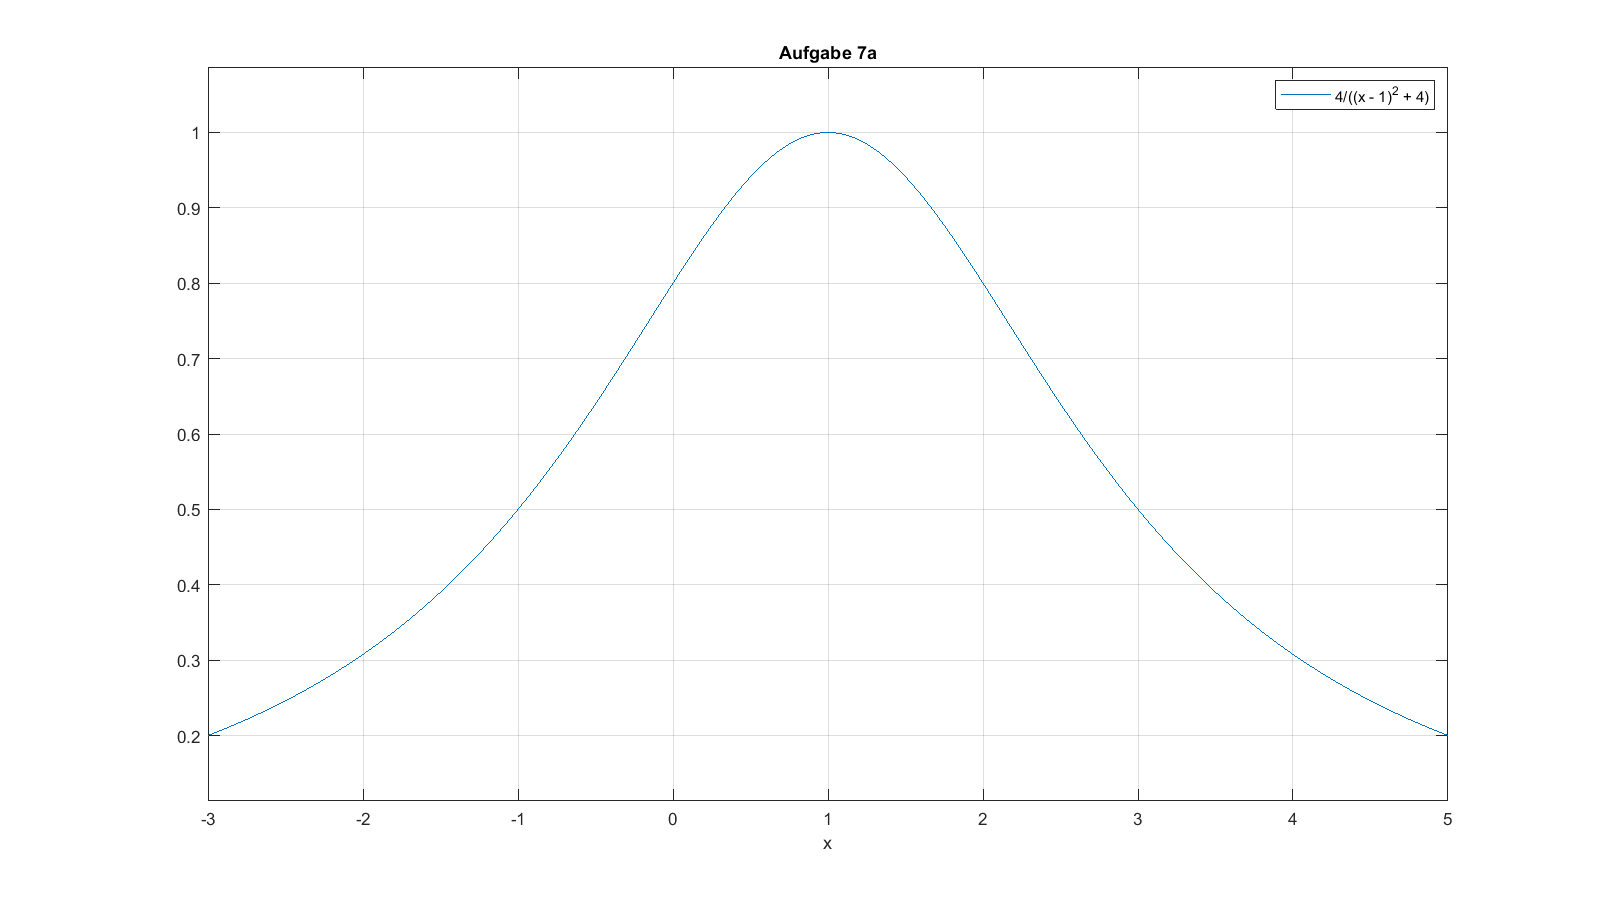

In [14]:
clear all;
syms x;
g = 4/((x-1)^2+4);

% solution: 2*atan(x/2 - 1/2)
indefG = int(g,x)
% solution: 2*[atan(2)-atan(-2)] = 4*atan(2) = const!
G = int(g, x, -3, 5)

ezplot(g,[-3 5])

set(gcf,'Position', [0 0 1280 720])
title('Aufgabe 7a')
legend(string(g))
grid on
hold off

**b)** Ermitteln Sie über den MATLAB-Befehl ``solve`` die Koordinatenwerte $(x1_W, g1_W)$ und $(x2_W, g2_W)$ der Wendepunkte von $g(x)$.
Ergänzen Sie den Skriptfile von Aufgabe 7a so, dass die Koordinatenwerte kompakt als zwei Spaltenvektoren
$$W_1 = \begin{pmatrix}x1_{max}\\g1_{max}\end{pmatrix}$$
und
$$W_2 = \begin{pmatrix}x2_{max}\\g2_{max}\end{pmatrix}$$
ausgegeben sowie in den Graphen von $g(x)$ als rote Kreise (o) eingetragen werden.

**Hinweis:** Wendepunkte liegen an den Nullstellen der 2. Ableitung der betreffenden Funktion.

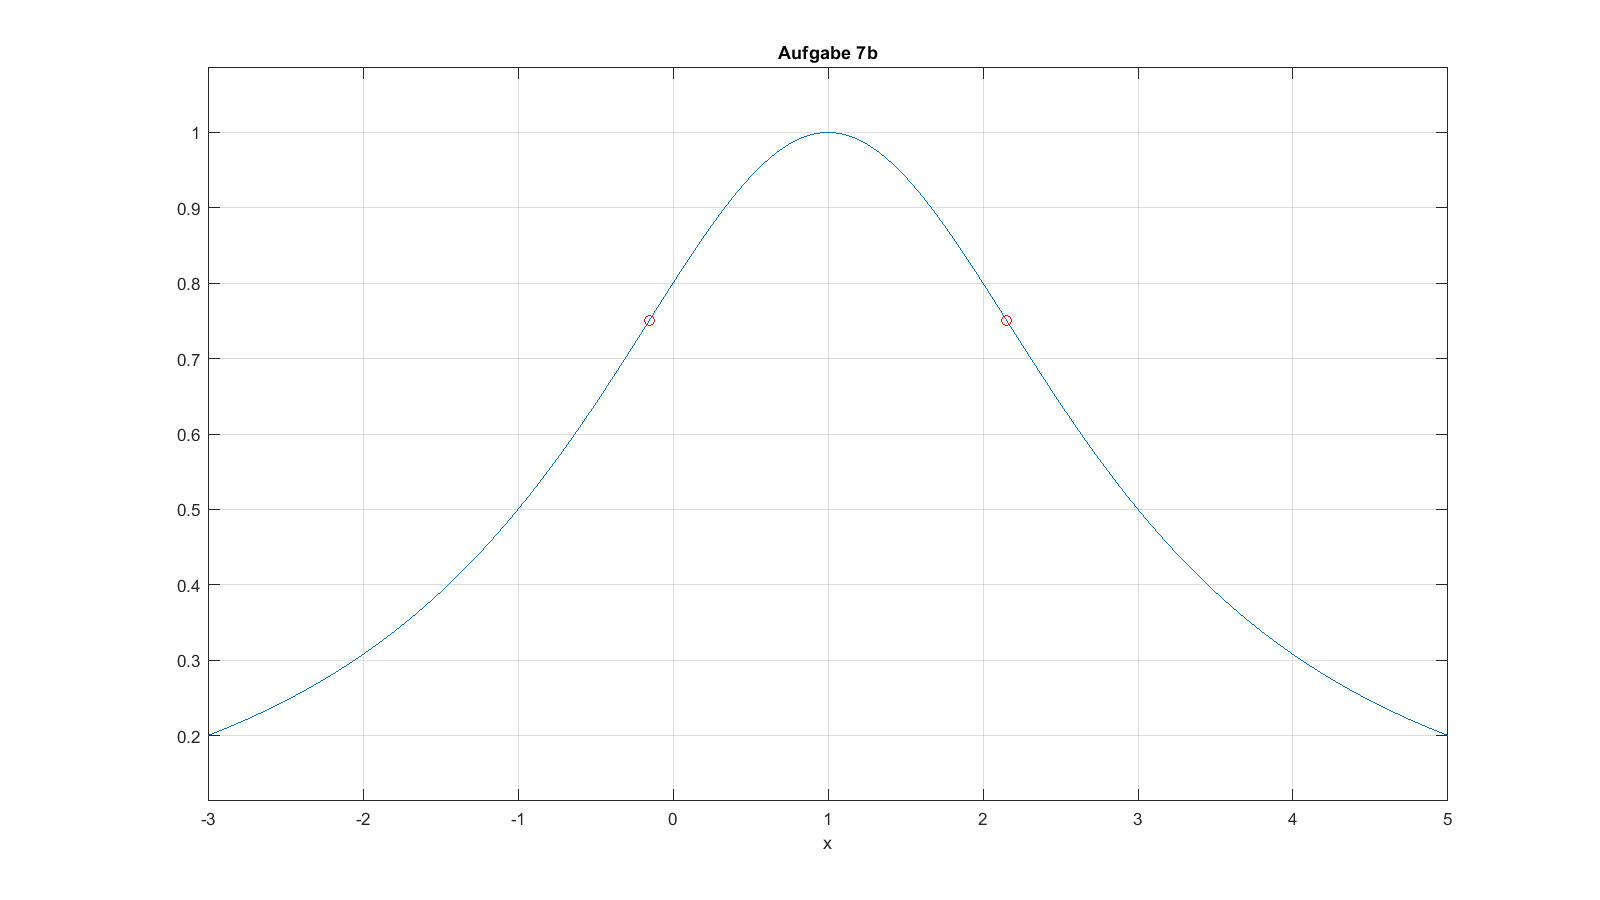

In [15]:
clear all;
clf;
syms x;
g = 4/((x-1)^2+4);
ddg = diff(g,x,2) == 0;

xi = solve(ddg);
yi = [compose(g,xi(1));compose(g,xi(2))]; % compose: plugs x-values into symbolic function g

W_1 = [xi(1); yi(1)]
W_2  = [xi(2); yi(2)]

ezplot(g,[-3 5])
hold on
scatter(xi, yi, 'r')

set(gcf,'Position', [0 0 1280 720])
title('Aufgabe 7b')
grid on
hold off